In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

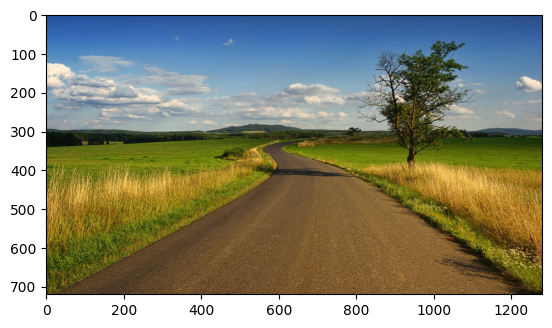

In [ ]:
# Read in the image
image = cv2.imread('/content/landscape-3127859_1280.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.90)
criteria

(3, 100, 0.9)

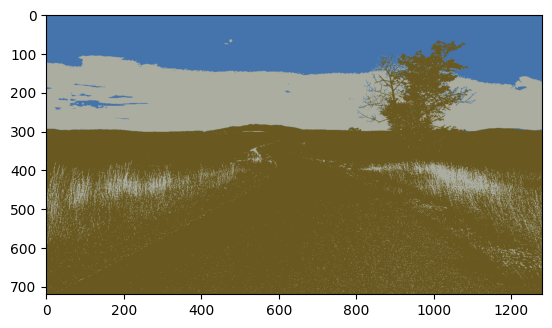

In [ ]:
# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)

#Metodo K-Means Using Sklearn


In [ ]:
from sklearn.cluster import KMeans
import os

In [ ]:
img = cv2.imread(os.path.join("/content/landscape-3127859_1280.jpg"))
img_convert = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #defining image to experiment with number of clusters
img.shape

(720, 1280, 3)

In [ ]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [ ]:
#image 4
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image3 = res.reshape((img_convert.shape))

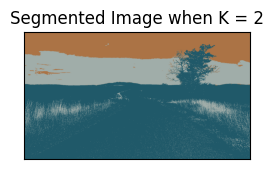

In [ ]:
#image 4
plt.subplot(2,2,4),plt.imshow(result_image3)
plt.title('Segmented Image when K = 2'), plt.xticks([]), plt.yticks([])
plt.show()